<a href="https://colab.research.google.com/github/shravankumargulvadi/Session-2/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

# Installing Keras 


In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


## Importing all the required Modules from keras

1. Sequential-The Sequential model is a linear stack of layers. Where each layer can be configured as per our requirement
2.Flatten- Converts a 2d data structure to 1d
3.Convolution2d-imports the module for 2D convolution
4.np_utils- Helper functions for numpy
5.mnist-Dataset containing handwritten digits 

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

## Splitting the data for training and testing

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Printing Size of the image in MNIST and a sample image

(60000, 28, 28)


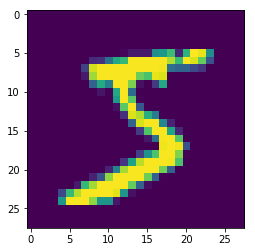

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Reshaping the MNIST images to 28x28x1

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Setting the 'type' to float32 (Decimel) and Normalizing the pixels by deviding it by 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Printing the first 10 target values

In [19]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Converting the target values to 1 hot encoding
ex: if the target value is 5 it's encoded as [0 0 0 0 0 1 0 0 0 0], 2 is encoded as [0 0 1 0 0 0 0 0 0 0]

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## Printing the first 10 examples of encoded targets

In [21]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Building the main model


In [22]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))  # Receptive field 3x3  #input channel dimensions 28x28x1
model.add(Convolution2D(64, 3, 3, activation='relu')) #Receptive field 5x5  #input channel dimensions 26x26x32
model.add(Convolution2D(128, 3, 3, activation='relu')) #Receptive field 7x7  #input channel dimensions 24x24x64

model.add(MaxPooling2D(pool_size=(2, 2))) #Receptive field 14x14  #input channel dimensions 22x22x64

model.add(Convolution2D(256, 3, 3, activation='relu')) #Receptive field 16x16   #input channel dimensions 11x11x64
model.add(Convolution2D(512, 3, 3, activation='relu')) #Receptive field 18x18  #input channel dimensions 9x9x256
model.add(Convolution2D(1024, 3, 3, activation='relu')) #Receptive field 20x20  #input channel dimensions 7x7x512
model.add(Convolution2D(2048, 3, 3, activation='relu')) #Receptive field 22x22  #input channel dimensions 5x5x1024
model.add(Convolution2D(10, 3, 3, activation='relu')) #Receptive field 24x24  #input channel dimensions 3x3x2048
#final output dimension 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

## Configuring the model for training
1.Loss- Is a measure of error and is the function which is to be minimized by the optimizer

2.Optimizer- optimizes the result by updating the weights in accordance with the loss

3. Metrics-A metric is a function that is used to judge the performance of the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Model training begins on training data witha each batch containing 32 images and no of epochs is 10 (no of times the model goes through the data)

In [25]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 14.5398 - acc: 0.0976
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 14.5463 - acc: 0.0975
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 14.5463 - acc: 0.0975
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 14.5463 - acc: 0.0975
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 14.5463 - acc: 0.0975
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 14.5463 - acc: 0.0975
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 14.5463 - acc: 0.0975
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 14.5463 - acc: 0.0975
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 14.5463 - acc: 0.0975
Epoch 10/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1

## Evaluate and Print score

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [27]:
print(score)

[14.54819266052246, 0.0974]


## Testing the Model on test data

In [0]:
y_pred = model.predict(X_test)

## Printing the first 10 predictions and first 10 targets for comparison

In [29]:
print(y_pred[:9])
print(y_test[:9])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[7 2 1 0 4 1 4 9 5]


## Add a new cell at the end of the file, explaining what (according to you) all is wrong with the network?

1. The second block has very high number of kernels 256 to 2048 which as explained in class is unnecessarily high and there are better ways to tackel it (1x1 covolution).
2. In the last layer there is transition from 2048 to 10 layers which may have caused dataloss.